In [4]:
# import standard modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Topic 3 - Testing a proposed model

## Motivation

We consider a simple empirical relation of the form

$
y = a x + b
$

between the input $x$ and output of an experiment. Here $a$ and $b$ are parameters that characterise the model. Suppose that results of the experiment, $y_{1}, \dots, y_{n}$ have been determined for the inputs $x_{1},\dots, x_{n}$. Our 
aim is to determine whether a proposed model, given in terms of the parameters $(a,b)$ could plausibly have
produced the observed data.  In discussing this problem, we will assume that the values of 
the $x_{i}$ are known precisely, but that the $y_{i}$ are subject to random errors drawn from a known
distribution. 

The code below produces a synthetic data set that we can work with.

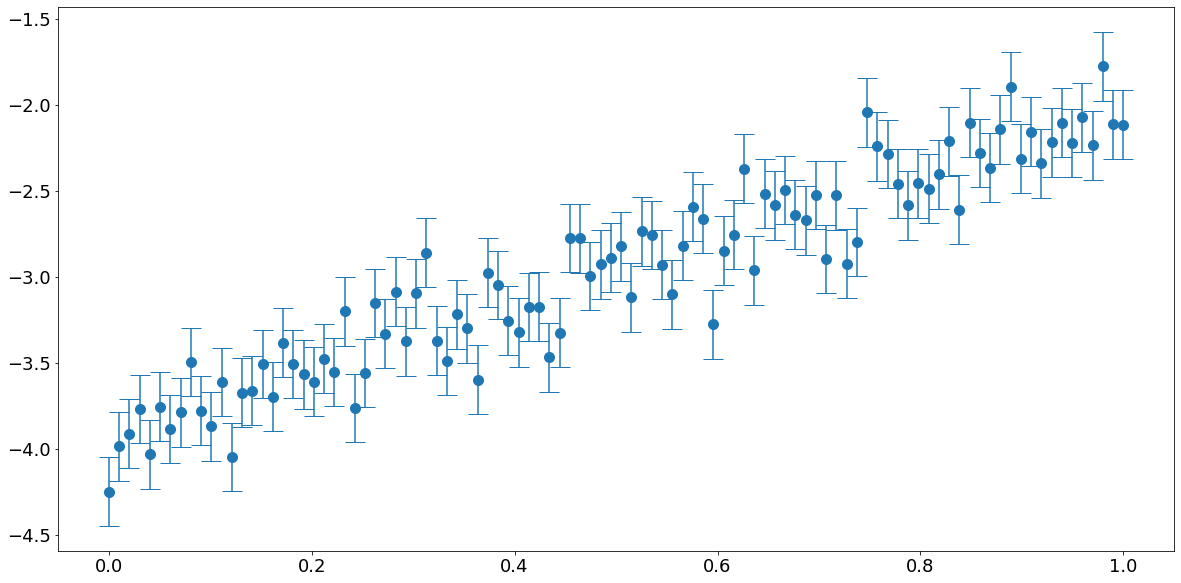

In [5]:
# Set the number of data
n = 100

# Set the true values for the parameters
a =  2
b = -4

# Set the values of x
x = np.linspace(0,1,n)

# Set the error distribution
sigma = 0.2
p = stats.norm(scale = sigma)

# Get the values of y
y = a*x + b + p.rvs(n)

# Plot the data
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 10)
plt.errorbar(x,y,yerr=sigma,linestyle='none',marker='o',markersize = 10,capsize = 10)
plt.show()

## Visual inspection

Having now generated our data, we can forget that we know how it was generated. Instead, suppose that the following parameter values have been proposed: $(a,b) = (2.5,-4.25)$. The first step in assessing the proposed model is simply to plot its predictions against the data.

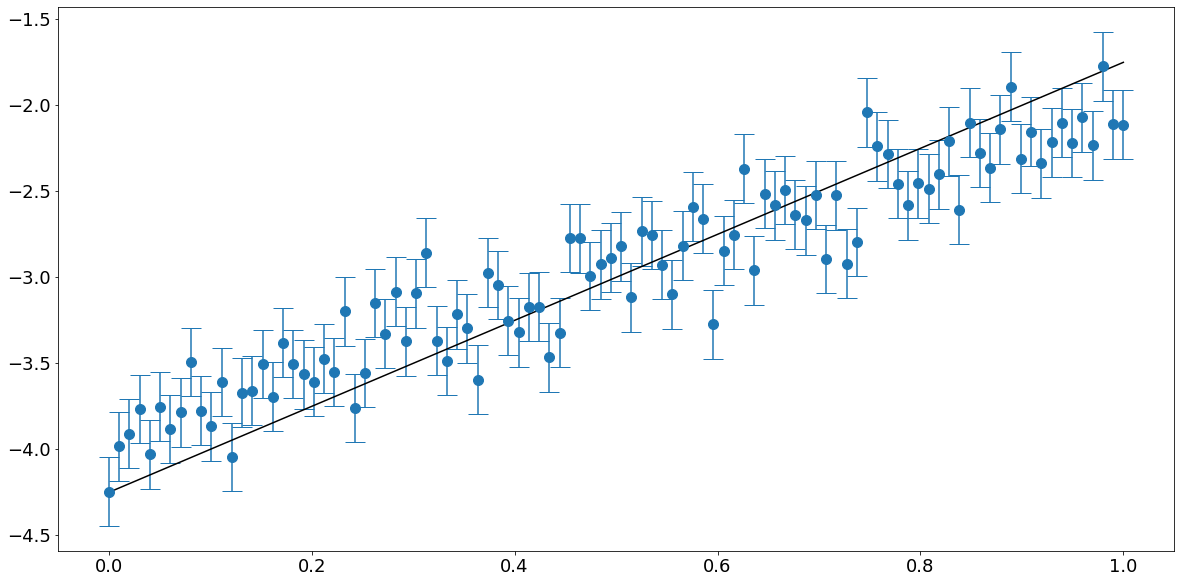

In [6]:
# Set the proposed model values
a = 2.5
b = -4.25

## Compute values for plotting the model
xx = np.linspace(0,1,100)
yy = a*xx+b

# Make the plot
plt.errorbar(x,y,yerr=sigma,linestyle='none',marker='o',markersize = 10,capsize = 10)
plt.plot(xx,yy,'k')
plt.show()

Looking at the comparison, we may or may not be inclined to accept this model. But we can probably agree that:
1. None of the data values seem obviously suspect
2. The form of the assumed model (i.e. a straight line) is probably is reasonable. 

Having conducted this basic check, we can continue move onto more complicated methods. The starting point is to assume that the proposed model is correct. We can then write 

$
y_{i} = a x_{i} + b + z_{i}, 
$

where $z_{i}$ random sample drawn from a normal distribution with mean zero and standard deviation $\sigma$. Through a simple rearrangement, we then have

$
\bar{z}_{i} = \frac{ y_{i} - a x_{i} - b}{\sigma} 
$

The values on the right hand side can be computed from the data and from the proposed model. In this manner, we have reduced the problem to asking whether it is plausible that these normalised data residuals, $\bar{z}_{1},\dots,\bar{z}_{n}$, could have been drawn from a standard normal distribution.

To proceed, let's compute their values and plot a histogram. 

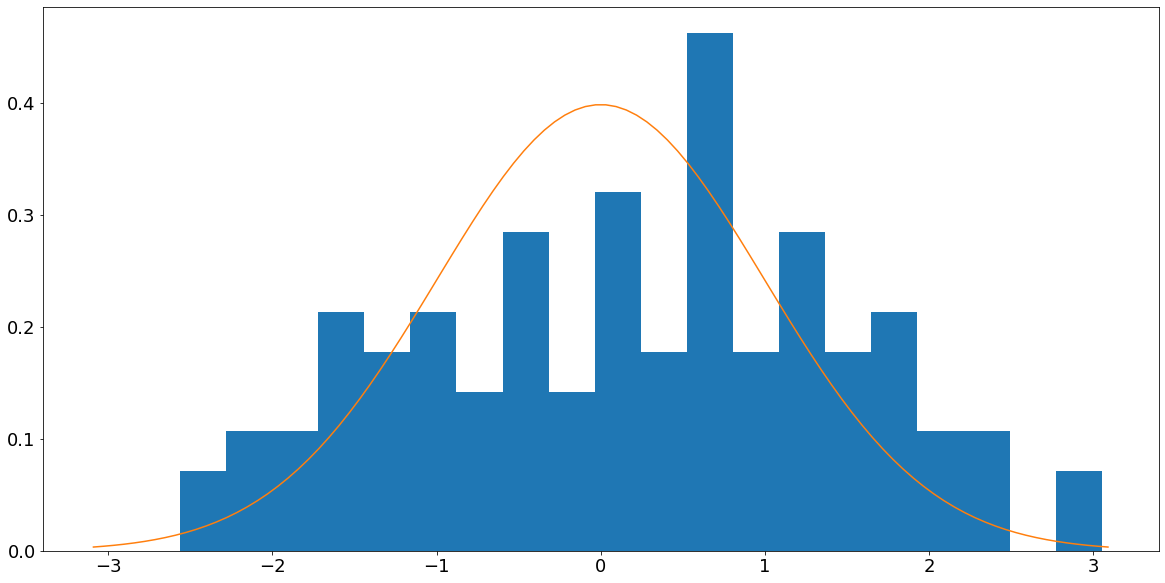

In [7]:
# compute the normalised residuals for the proposed model
z = (y - a*x - b)/sigma

# Plot the histogram
plt.hist(z,bins = 20,density=True)

# Plot the pdf for standard normal distribution
Z = stats.norm()
yy = np.linspace(Z.ppf(0.001),Z.ppf(0.999),100)
pp = Z.pdf(yy)
plt.plot(yy,pp)

plt.show()

Looking at this result, it is perhaps still unclear as to whether the proposed model is acceptable. 


## Designing a statistical test

The key idea of **hypothesis testing** is the following: is plausible that the assumed model generated the observed data? If we decide that it is, then the model is accepted, and if not, the model is rejected. Suppose that we design a testing procedure that accepts *all* proposed models. This has the advantage that it will never reject the true model. On the otherhand, we might design a test that rejects all proposed models, and hence 
it can never accept a false model. These extreme cases point to a tension inherent in designing a hypothesis test. 
We would like to minimise the chance of rejecting the true model while simultaneously minimising the chance 
of accepting false models. Within the statistics literature, these opposing ideas are known as **type 1** and 
**type 2** errors, and their analysis leads to the introduction of the **power** of a statistical test. There 
is not scope within this course to enter into these ideas in any detail. Insteady, we simply state that good appropriate statistical tests have been determined for a wide range of problems. For the problem at hand, the appropriate approach is known as the **chi-squared test**.

## Applying the chi-squared test

Within a hypothesis test, we use the data and the assumed model to compute the value of
the **test statistic**. In this case, it is given by

$
\chi^{2} = \sum_{i=1}^{n} \bar{z}_{i}^{2} =  \sum_{i=1}^{n} \frac{(y_{i}-a x_{i}-b)^{2}}{\sigma^{2}}
$

Assuming that the model is correct, the distribution of the test statistic is known. Below we plot the PDF for $\chi^{2}$ while also showing the value of the test-statistic computed using the data. 


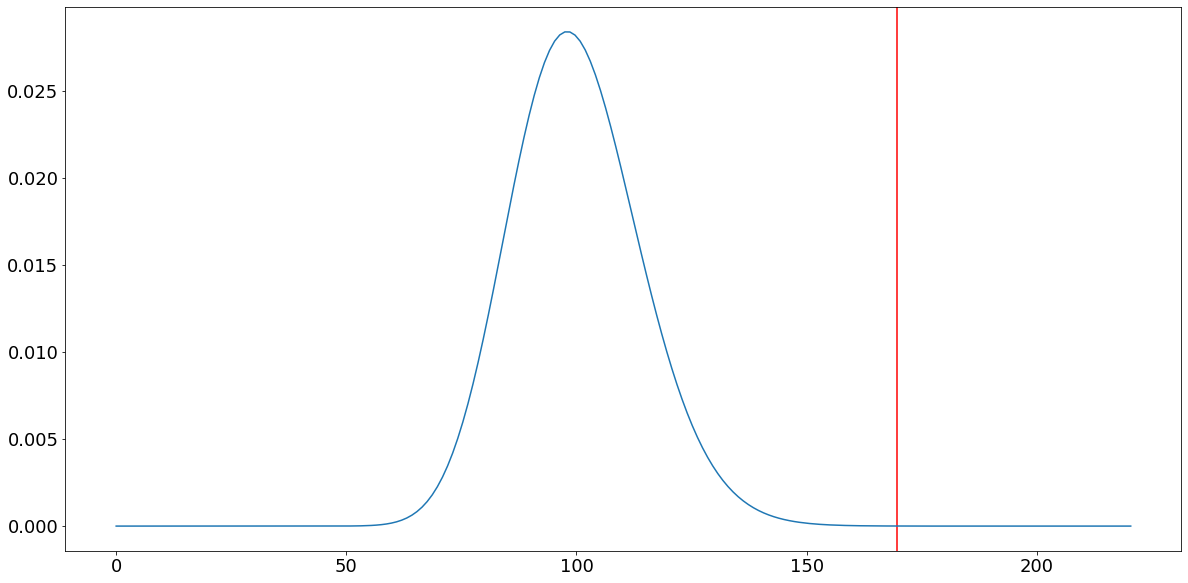

In [8]:
# Compute the value of chi2 from the data
chi2 = np.sum(z*z)
plt.axvline(x = chi2, color = 'r')

# Plot the chi-squared pdf
Chi2 = stats.chi2(n)
xx = np.linspace(0,max(Chi2.ppf(0.999),1.3*chi2), 200)
pp = Chi2.pdf(xx)
plt.plot(xx,pp)
plt.show()

We can see clearly that the value of $\chi^{2}$ computed from the asssumed model has a  low probability of being sampled from this distribution. This suggests that it is indeed implausible that the assumed model generated the data, and hence that the model should be rejected. 

Building on this idea, suppose we agree that there is a value, $\chi_{c}^{2}$ of $\chi^{2}$ that is sufficiently large that 
a propsed model should be rejected. It then make sense that we should reject any other model for 
which $\chi^{2}$ is this big or larger. We can quantify the performance of such a test by computing the probability that it will reject a true model. Using the CDF for the $\chi^{2}$-distribution this is readily done:

$
p = 1 - F_{\chi^{2}}(\chi^{2}_{c})
$

In practice, it is more convenient to select a desired value, $\alpha$, for this probability  and use this to select a critical value for the test statistic. The value of $\alpha$ is known as the **significance level** of the hypothesis test, with conventional values being 
$5$\% or less. Having decided on a significance level, we can now formulate the test as follows. From
the data we compute $\chi^{2}$, and use this to calculate the **p-value**

$
p = 1 - F_{\chi^{2}}(\chi^{2})
$

which we recall is the propability that the model would have generated a value as more more extreme than that observed. If this value falls below the significance level, meaning $p < \alpha$, we then reject the proposed model as being implausible given the data. 

The p-value for our model is computed below, and at this point we can probaly agree that it is so low that the model should be rejected. 

In [9]:
# Compute the p-value
pv = 1 - Chi2.cdf(chi2)
print("p-value = %7.4e" % pv)

p-value = 1.7517e-05


## A key point

To conclude this discussion it is worth highlighting a common error when people talk about p-values. What this number quantifies is the probability that the assumed model could have generated the observed data. Thus, if we say that a model has been rejected using a statistical test with a $1$% significance level, what we absolutely **do not mean** is that there is a $1$% chance that the model is correct. The probabilities we calculate have nothing to do with the chance of a model being correct. They merely quantify how likely the observed data would be under an assumed model. 

Using **Bayesian statistics**, it is possible to make probabilistic statements about models. For this, and other reasons, this is an approach that is favoured by some people. There is not scope within the skills course to discuss Bayesian methods, but you are welcome to ask about them. 
